# k-Nearest Neighbours classifier

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial import distance

%matplotlib inline

/home/aloys/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## k-NN algorithm

In [2]:
class ScrappyKNN():
    '''Simplest form of a k-Nearest neighbours classifier.'''
    def __init__(self, k=1):
        self.k = k
    
    def fit(self, xTrain, yTrain):
        '''Fit the training data.'''
        self.xTrain = xTrain
        self.yTrain = yTrain
    
    def predict(self, xTest):
        '''Predict the labels of an unknown test dataset.'''
        predictions = []
        
        for row in xTest:
            label = self._closest(row)
            predictions.append(label)
            
        return predictions
    
    def _closest(self, row):
        '''Calculate the closest neighbour of a row.'''
        kBestDist = []
        kBestIndex = []
        
        for jj in range(self.k):
            bestDist = distance.euclidean(row, self.xTrain[0])
            bestIndex = 0

            for ii in range(1, len(self.xTrain)):
                if ii in kBestIndex:
                    pass
                else:
                    dist = distance.euclidean(row, self.xTrain[ii])
                    if dist < bestDist:
                        bestDist = dist
                        bestIndex = ii
            
            kBestDist.append(bestDist)
            kBestIndex.append(bestIndex)
        
        return self._weighted_label(kBestDist, kBestIndex)
    
    
    def _weighted_label(self, kBestDist, kBestIndex):
        distWeight = (1/np.array(kBestDist)**2)

        weights = np.zeros(len(set(self.yTrain)))

        for ii in range(self.k):
            index = yTrain[kBestIndex][ii]
            weights[index] += distWeight[ii]

        return np.argmax(weights)

## Import data and visualise features

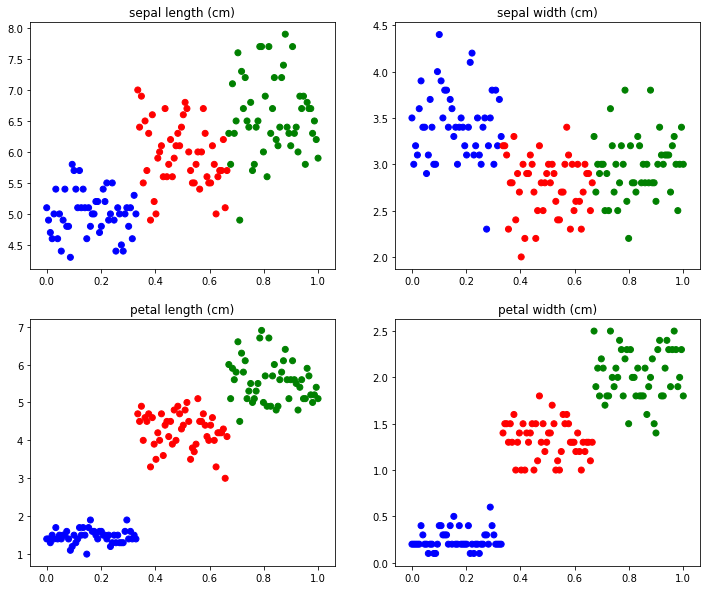

In [3]:
iris = datasets.load_iris()

xTrain, xTest, yTrain, yTest = train_test_split(iris.data, iris.target, test_size=.5)


x = np.linspace(0, 1, len(iris.data))

colours = ['blue', 'red', 'green']
clrs = [colours[target] for target in iris.target]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))
for ii in range(4):
    ax[int(ii/2), ii%2].scatter(x, iris.data[:, ii], c=clrs)
    ax[int(ii/2), ii%2].set_title(iris.feature_names[ii])
plt.show()

## Train classifier and test score

In [8]:
myClassifier = ScrappyKNN(k=5)

myClassifier.fit(xTrain, yTrain)

predictions = myClassifier.predict(xTest)

score = accuracy_score(yTest, predictions)
print(score)

/home/aloys/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in divide


0.96
